# Obtaining data from CSV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('BankChurners.csv')
X = dataset.iloc[:,2:-2].values
y = dataset.iloc[:,1].values
print(y)

['Existing Customer' 'Existing Customer' 'Existing Customer' ...
 'Attrited Customer' 'Attrited Customer' 'Attrited Customer']


In [3]:
print(X[:][3])

[40 'F' 4 'High School' 'Unknown' 'Less than $40K' 'Blue' 34 3 4 1 3313.0
 2517 796.0 1.405 1171 20 2.333 0.76]


# Encoding various X variables

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(handle_unknown='ignore'),[1,3,4,5,6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [5]:
print(X[0][0])

0.0


<AxesSubplot:xlabel='Card_Category', ylabel='Credit_Limit'>

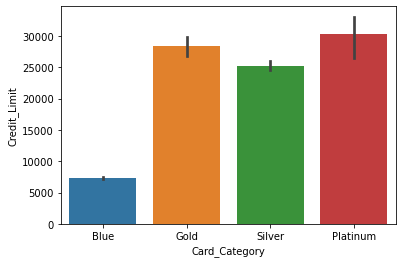

In [6]:
import seaborn as sns
sns.barplot(x=dataset['Card_Category'],y=dataset['Credit_Limit'])

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

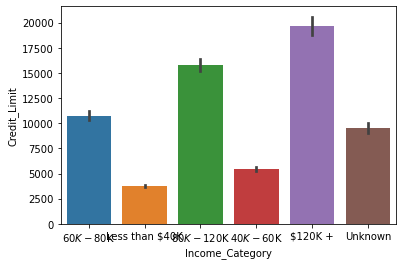

In [7]:
sns.barplot(x=dataset['Income_Category'],y=dataset['Credit_Limit'])

<AxesSubplot:xlabel='Marital_Status', ylabel='Credit_Limit'>

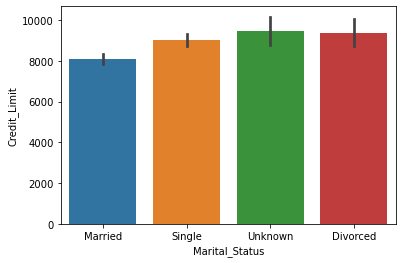

In [8]:
sns.barplot(x=dataset['Marital_Status'],y=dataset['Credit_Limit'])

<AxesSubplot:xlabel='Education_Level', ylabel='Credit_Limit'>

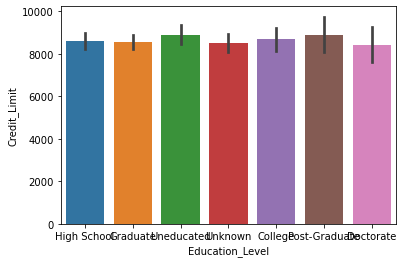

In [9]:
sns.barplot(x=dataset['Education_Level'],y=dataset['Credit_Limit'])

In [10]:
print(X[:][3])

[1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0
 0.0 1.0 0.0 0.0 0.0 40 4 34 3 4 1 3313.0 2517 796.0 1.405 1171 20 2.333
 0.76]


([<matplotlib.patches.Wedge at 0x272ceea0d60>,
 [Text(-0.9628371444551311, 0.5319254019667504, 'Existing Customer'),
  Text(0.9628371693563555, -0.5319253568930898, 'Attrited Customer')],
 [Text(-0.525183896975526, 0.29014112834550015, '83.9%'),
  Text(0.5251839105580121, -0.2901411037598671, '16.1%')])

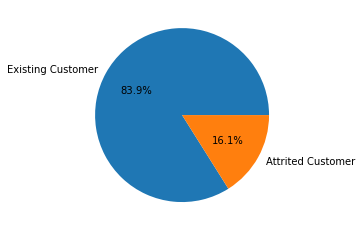

In [11]:
churn = dataset['Attrition_Flag'].value_counts()
plt.pie(x=churn,labels=churn.keys(),autopct='%.1f%%')

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='Total_Trans_Ct'>

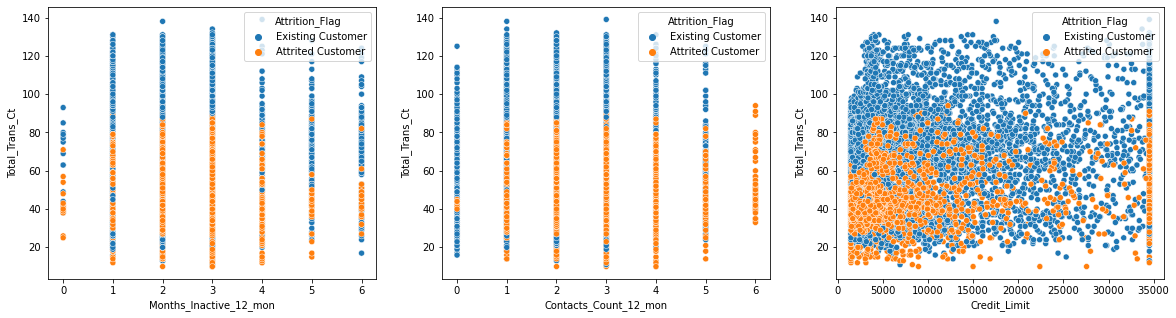

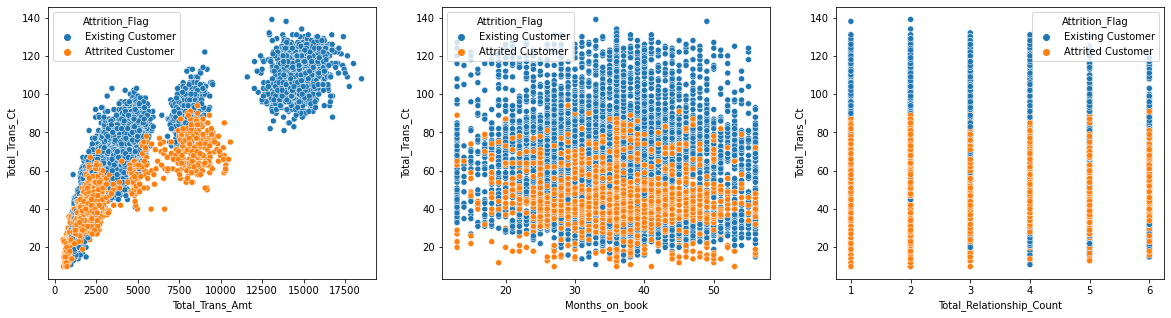

In [12]:
fig,ax=plt.subplots(ncols=3,figsize=(20,5))
sns.scatterplot(x=dataset['Months_Inactive_12_mon'],y=dataset['Total_Trans_Ct'],hue=dataset['Attrition_Flag'],ax=ax[0])
sns.scatterplot(x=dataset['Contacts_Count_12_mon'],y=dataset['Total_Trans_Ct'],hue=dataset['Attrition_Flag'],ax=ax[1])
sns.scatterplot(x=dataset['Credit_Limit'],y=dataset['Total_Trans_Ct'],hue=dataset['Attrition_Flag'],ax=ax[2])
fig,ax=plt.subplots(ncols=3,figsize=(20,5))
sns.scatterplot(x=dataset['Total_Trans_Amt'],y=dataset['Total_Trans_Ct'],hue=dataset['Attrition_Flag'],ax=ax[0])
sns.scatterplot(x=dataset['Months_on_book'],y=dataset['Total_Trans_Ct'],hue=dataset['Attrition_Flag'],ax=ax[1])
sns.scatterplot(x=dataset['Total_Relationship_Count'],y=dataset['Total_Trans_Ct'],hue=dataset['Attrition_Flag'],ax=ax[2])

In [13]:
dataset_x=pd.concat([dataset['Total_Trans_Ct'],dataset['Total_Trans_Amt'],dataset['Months_Inactive_12_mon'],dataset['Credit_Limit']],axis=1)
print(dataset_x)

       Total_Trans_Ct  Total_Trans_Amt  Months_Inactive_12_mon  Credit_Limit
0                  42             1144                       1       12691.0
1                  33             1291                       1        8256.0
2                  20             1887                       1        3418.0
3                  20             1171                       4        3313.0
4                  28              816                       1        4716.0
...               ...              ...                     ...           ...
10122             117            15476                       2        4003.0
10123              69             8764                       2        4277.0
10124              60            10291                       3        5409.0
10125              62             8395                       3        5281.0
10126              61            10294                       2       10388.0

[10127 rows x 4 columns]


In [14]:
dataset_demographic=pd.concat([dataset['Customer_Age'],dataset['Gender'],dataset['Education_Level'],dataset['Marital_Status'],dataset['Income_Category'],dataset['Attrition_Flag']],axis=1)

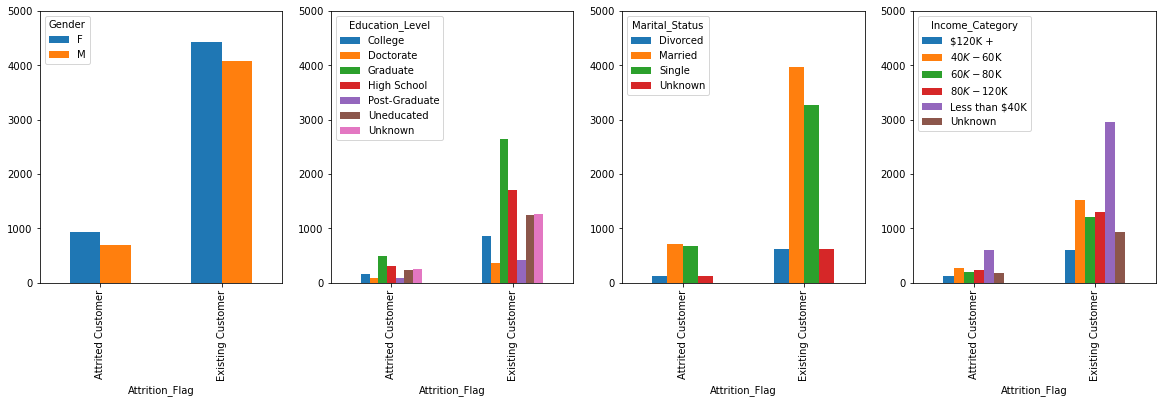

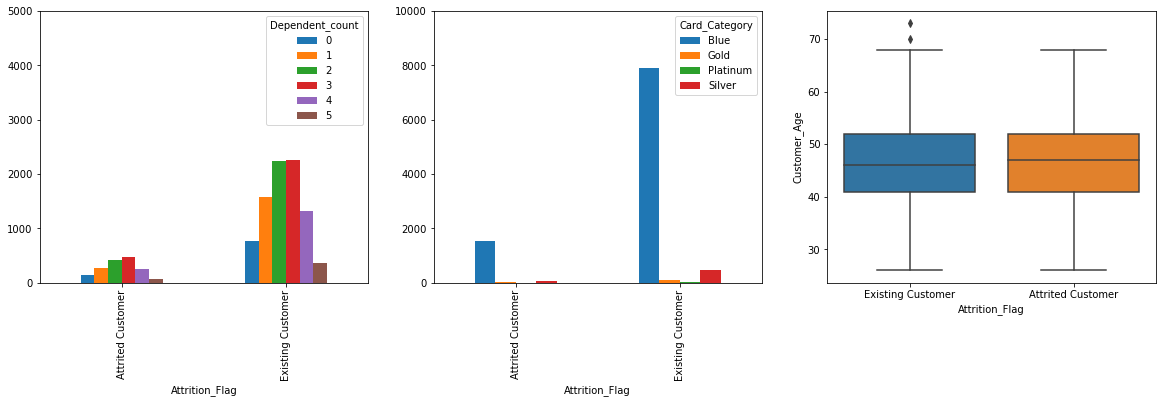

In [15]:
fig,(ax, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(dataset['Attrition_Flag'],dataset['Gender']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(dataset['Attrition_Flag'],dataset['Education_Level']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(dataset['Attrition_Flag'],dataset['Marital_Status']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(dataset['Attrition_Flag'],dataset['Income_Category']).plot(kind='bar',ax=ax4, ylim=[0,5000])

fig,(ax, ax2, ax3)=plt.subplots(ncols=3,figsize=(20,5))
pd.crosstab(dataset['Attrition_Flag'],dataset['Dependent_count']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(dataset['Attrition_Flag'],dataset['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])
_box=sns.boxplot(data = dataset_demographic,x='Attrition_Flag',y='Customer_Age', ax=ax3)

In [16]:
df_categorical = dataset.loc[:,dataset.dtypes==np.object]
df_categorical = df_categorical[['Gender','Education_Level','Marital_Status','Income_Category','Card_Category','Attrition_Flag']]
df_categorical.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,M,High School,Married,$60K - $80K,Blue,Existing Customer
1,F,Graduate,Single,Less than $40K,Blue,Existing Customer
2,M,Graduate,Married,$80K - $120K,Blue,Existing Customer
3,F,High School,Unknown,Less than $40K,Blue,Existing Customer
4,M,Uneducated,Married,$60K - $80K,Blue,Existing Customer


In [17]:
df_numerical = dataset.loc[:,dataset.dtypes!=np.object]
df_numerical['Attrition_Flag']=dataset.loc[:,'Attrition_Flag']
oh=pd.get_dummies(df_numerical['Attrition_Flag'])
df_numerical=df_numerical.drop(['Attrition_Flag'],axis=1)
df_numerical=df_numerical.drop(['CLIENTNUM'],axis=1)
df_numerical=df_numerical.join(oh)
df_numerical.head()

<ipython-input-17-403d43c0703d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['Attrition_Flag']=dataset.loc[:,'Attrition_Flag']


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Attrited Customer,Existing Customer
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,0,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,0,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,0,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,0,1


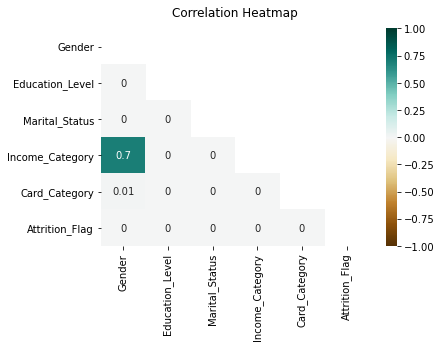

In [18]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
df_categorical_encoded = pd.DataFrame()
for i in df_categorical.columns:
    df_categorical_encoded[i]=label.fit_transform(df_categorical[i])

from scipy.stats import chi2_contingency

def cramers_V(var1,var2):
    crosstab = np.array(pd.crosstab(var1,var2,rownames=None,colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1
    return(stat/(obs*mini))
rows = []

for var1 in df_categorical_encoded:
    col = []
    for var2 in df_categorical_encoded:
        cramers = cramers_V(df_categorical_encoded[var1],df_categorical_encoded[var2])
        col.append(round(cramers,2))
    rows.append(col)

cramers_results = np.array(rows)
cramerv_matrix =pd.DataFrame(cramers_results,columns=df_categorical_encoded.columns,index=df_categorical_encoded.columns)
mask=np.triu(np.ones_like(cramerv_matrix,dtype=np.bool))
cat_heatmap = sns.heatmap(cramerv_matrix,mask=mask,vmin=-1,vmax=1,annot=True,cmap='BrBG')
cat_heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':12},pad=12);

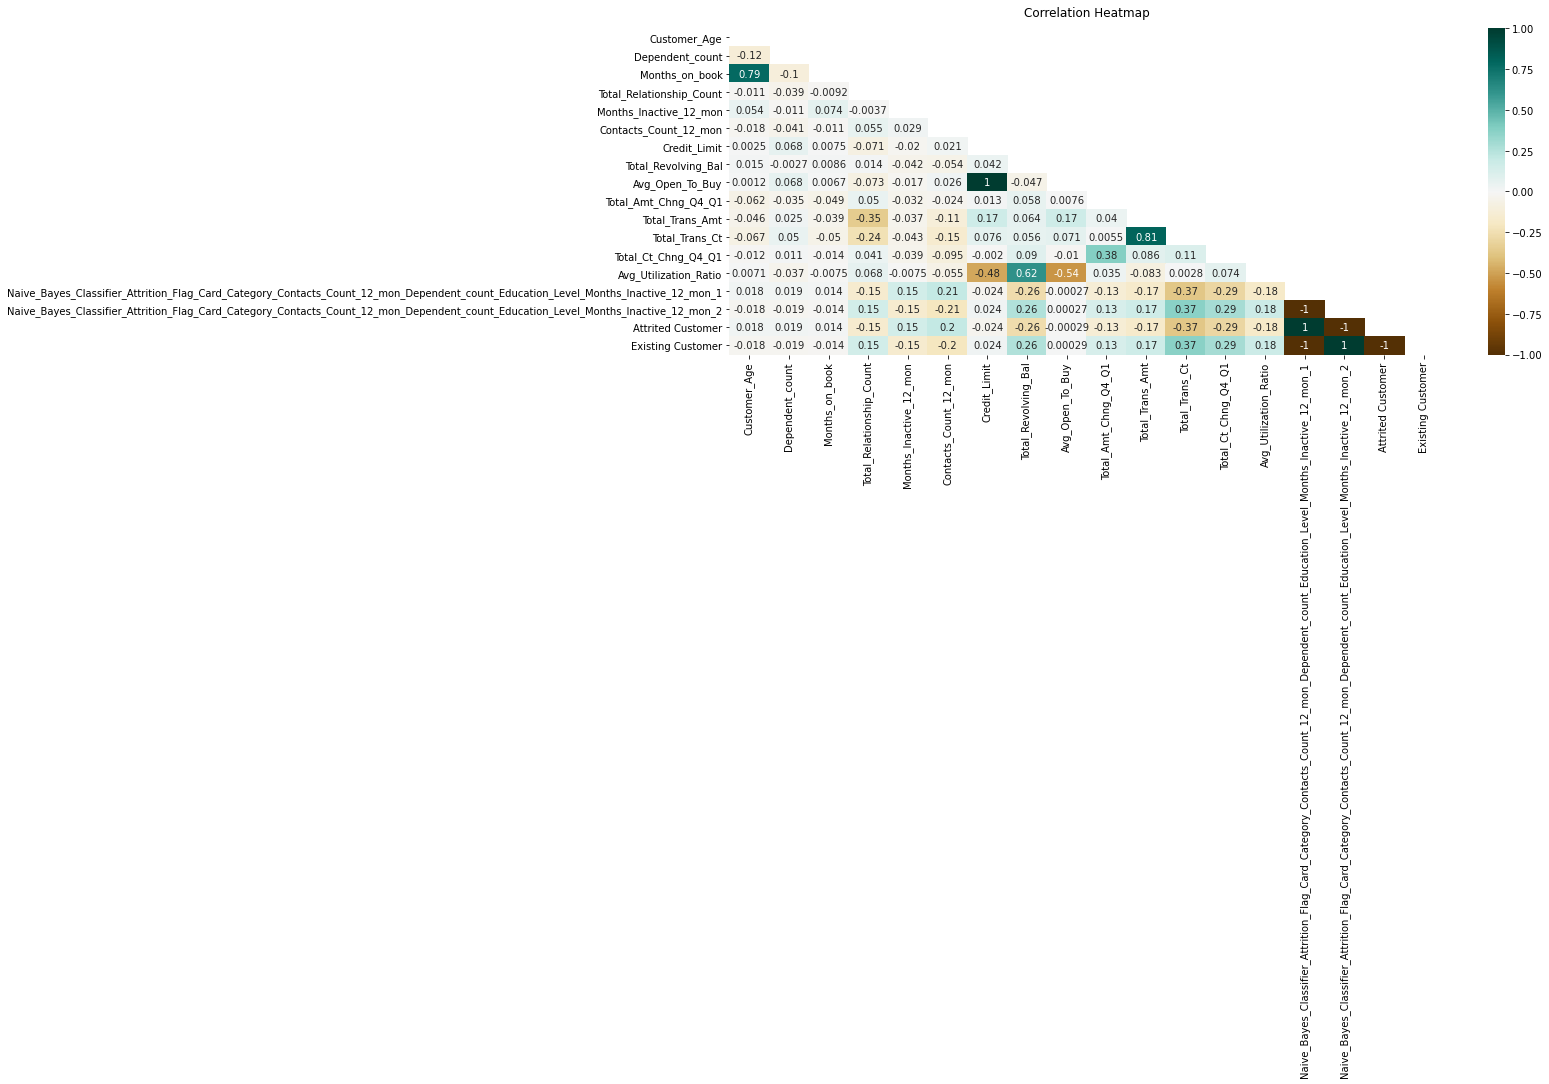

In [19]:
from scipy import stats
num_corr=df_numerical.corr()
plt.figure(figsize=(16,6))
mask=np.triu(np.ones_like(num_corr,dtype=np.bool))
num_heatmap = sns.heatmap(num_corr,mask=mask,vmin=-1,vmax=1,annot=True,cmap='BrBG')
num_heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':12},pad=12);

# Encoding y variable

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
print(y)

[1 1 1 ... 0 0 0]


# Splitting training and testing variables

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [23]:
print(X_train)

[[0.0 1.0 1.0 ... 82 0.745 0.068]
 [0.0 1.0 0.0 ... 30 0.429 0.03]
 [1.0 0.0 0.0 ... 64 0.882 0.0]
 ...
 [0.0 1.0 0.0 ... 25 0.47100000000000003 0.0]
 [1.0 0.0 0.0 ... 79 0.8809999999999999 0.621]
 [0.0 1.0 1.0 ... 27 1.455 0.147]]


# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,-14:] = sc.fit_transform(X_train[:,-14:])
X_test[:,-14:] = sc.transform(X_test[:,-14:])

In [25]:
print(X_train[0])

[0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 1.0 0.5829728557604165 -1.7963639741656139
 -0.1122301567729592 0.7593767185647309 -1.3258165744878991
 -0.4259897904724371 2.835664168069641 1.4427168079734094
 2.707014194157972 0.18184398104855518 0.04791122138239282
 0.7265386623352077 0.13644352228115758 -0.7482530901063787]


# Training XGboost

In [31]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

C:\Users\Yoga\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 297   34]
 [  22 1673]]


0.9723593287265548

In [33]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\Yoga\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

# Training Random Forest Classification model

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Confusion Matrix for Random Forest Classification

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[ 277   54]
 [  33 1662]]


0.9570582428430404

# Training Decision Tree Classification Model

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Confusion Matrix for Decision Tree Classification Model

In [30]:
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[ 274   57]
 [  57 1638]]


0.9437314906219151